# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 6 </center>

# <center>Linear Regression for Supervised Learning</center>

![image-8.png](attachment:image-8.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Creating Simple Linear Model</li>
<li> Explore Linear Model attributes</li>
<li> Find MSE </li>
<li> Make Predictions for simple linear model</li>
<li> Create Multiple Linear Model </li>
<li> Make Predictions for multiple linear model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use sklearn library to create first machine learning model and implement sklearn LinearRegression model for both univariate and mulitple features.

By the end of the lab, you should be able to :
- Load required dataset and library for training machine learning model


- Implement sklearn LinearRegression algorithm for simple linear model as well as multiple linear model.


- Find MSE for the created model


- Make prediction for unseen data

## <font color = blue>1. Loading Data

    - Load boston housing data from sklearn.datasets module. Create dataframe from the boston data.

In [ ]:
#solution
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
import pandas as pd
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [ ]:
df['Target'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

## <font color = blue>2. Creating simple Linear Model

INSTRUCTIONS:-
    
- The boston dataset contain many features. To implement simple linear regression model, let us choose any one feature that is mostly related to the target feature. 
    
    
- Use dataframe `corr()` method to check correlation between each features with target feature. Use heatmap to display the correlation.
    
    
- Which feature is mostly related to the target feature? Choose that feature to create linear Model.
    
    
- Import `LinearRegression()` from sklearn `linear_model` module. Create LinearRegression() object and fit the dataset to train the model


In [ ]:
#Solution
dt = df.corr()
dt

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Target  -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    Target  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Target   0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

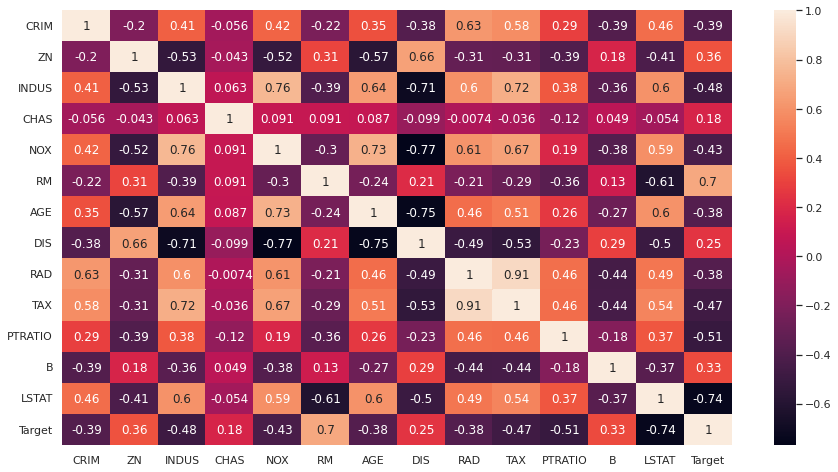

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(dt, annot = True)

In [ ]:
# create feature
X = df[['RM']]
y = df.Target

In [ ]:
from sklearn.linear_model import LinearRegression
# create LinearRegression model
lr = LinearRegression() # lr is a model

# Train model using fit method
lr.fit(X, y)

LinearRegression()

## <font color = blue>3. Explore Linear Model attributes


In [ ]:
#use coef_ attributes to get weights. We have only one weights since it is simple linear model
# lr = f(x)
# lr.coef_ = W
lr.coef_ 


array([9.10210898])

In [ ]:
#use intercept_ attributes to get the bias value
lr.intercept_ # lr.intercept = b


-34.67062077643857

## <font color = blue>4. Find MSE
- sklearn provides `mean_squared_error()` method to check MSE for a given model. `mean_squared_error()` expect y_prediction and actual y value as its paramters. use linear model's `predict()` method to get y_prediction.
    
 `sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)`

In [ ]:
#creating y_pred
from sklearn.metrics import mean_squared_error #its a function

y_pred = lr.predict(X)
MSE = mean_squared_error(y_pred, y)
MSE

43.60055177116956

## <font color = blue>5. Make Predictions


In [ ]:
#Use predict method to make prediction to unseen data
x_sample = [[6], [7]]
lr.predict(x_sample)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19.94203311, 29.04414209])

## <font color = blue>6. Create Multiple Linear Regression Model

- Explore the Multiple Linear regression model choosing any number of features you are comfortable with. Remember you can use the same LinearRegression() algorithm.

In [ ]:
X_2 = df[['RM', 'LSTAT', 'ZN', 'PTRATIO']]
y_2 = df.Target

In [ ]:
from sklearn.linear_model import LinearRegression
# create LinearRegression model
lr_2 = LinearRegression() # lr is a model

# Train model using fit method
lr_2.fit(X_2, y_2)

LinearRegression()

In [ ]:
lr_2.coef_

array([ 4.52644212, -0.57974938, -0.00844919, -0.95530122])

In [ ]:
lr_2.intercept_


19.147985438362912

In [ ]:
from sklearn.metrics import mean_squared_error #its a function

y_pred_2 = lr_2.predict(X_2)
MSE = mean_squared_error(y_pred_2, y_2)
MSE

27.10083294988646

## <font color = blue>7. Make Prediction for Multi linear Model


In [ ]:
#Solution
RM = 7
LSTAT = 5
ZN = 18
PTRATIO = 18

x_simple_2 = [[RM, LSTAT, ZN, PTRATIO]]
lr_2.predict(x_simple_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([30.58682596])

In [ ]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

# TODO/HOMEWORK : Creating Linear Model
- Create multiple Linear Regression model with the same features you chose in subtask 6 above. Use any feature scaling techniques to scale the features and train the model. 


- Explore the difference in the result when using unscaled and scaled features.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric = scaler.fit_transform(df)
df2 = pd.DataFrame(numeric,columns=df.columns) 
df2

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0   -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1   -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2   -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3   -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4   -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.413229 -0.487722  0.115738 -0.272599  0.158124  0.439316  0.018673   
502 -0.415249 -0.487722  0.115738 -0.272599  0.158124 -0.234548  0.288933   
503 -0.413447 -0.487722  0.115738 -0.272599  0.158124  0.984960  0.797449   
504 -0.407764 -0.487722  0.115738 -0.272599  0.158124  0.725672  0.736996   
505 -0.415000 -0.487722  0.115738 -0.272599  0.158124 -0.362767  0.434732   

          DIS       RAD       TAX   PTRATIO         B     LSTAT    Target  
0    0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1    0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2    0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3    1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4    1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  
..        ...       ...       ...       ...       ...       ...       ...  
501 -0.625796 -0.982843 -0.803212  1.176466  0.387217 -0.418147 -0.014454  
502 -0.716639 -0.982843 -0.803212  1.176466  0.441052 -0.500850 -0.210362  
503 -0.773684 -0.982843 -0.803212  1.176466  0.441052 -0.983048  0.148802  
504 -0.668437 -0.982843 -0.803212  1.176466  0.403225 -0.865302 -0.057989  
505 -0.613246 -0.982843 -0.803212  1.176466  0.441052 -0.669058 -1.157248  

[506 rows x 14 columns]

In [58]:
lr_3 = LinearRegression()
X_3 = df2[['RM','LSTAT','PTRATIO', 'ZN']]
y_3 = df2.Target
lr_3.fit(X_3,y_3)

LinearRegression()

In [59]:
y_pred_3 = lr_3.predict(X_3)
MSE = mean_squared_error(y_pred_3, y_3)
MSE

0.32102553228014286